## Assignment 3 Experiment 2 [Transfer Learning using RNNs]

In [0]:
%matplotlib inline

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout
from keras.layers import LSTM, CuDNNLSTM
from keras.datasets import imdb

from distutils.version import LooseVersion as LV
from keras import __version__
from keras import backend as K

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

print('Using Keras version:', __version__, 'backend:', K.backend())
assert(LV(__version__) >= LV("2.0.0"))

Using TensorFlow backend.


Using Keras version: 2.2.4 backend: tensorflow


In [0]:
import matplotlib.pyplot as plt
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()
    
def plotAcc(history):  
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

In [0]:
def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    
    # Begin CHANGES
    fst_empty_cell = (columnwidth-3)//2 * " " + "t/p" + (columnwidth-3)//2 * " "
    
    if len(fst_empty_cell) < len(empty_cell):
        fst_empty_cell = " " * (len(empty_cell) - len(fst_empty_cell)) + fst_empty_cell
    # Print header
    print("    " + fst_empty_cell, end=" ")
    # End CHANGES
    
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
        
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()

In [0]:
# number of most-frequent words to use
nb_words = 10000
# cut texts after this number of words
maxlen = 80

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=nb_words)
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print()

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
17465344/17464789 [==============================] - 1s 0us/step
x_train: (25000,)
x_test: (25000,)

Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


In [0]:
# model parameters:
embedding_dims = 50
lstm_units = 32


## Using best RNN model from experiment 1 to train IMDB dataset

In [0]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)


In [0]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(nb_words, embedding_dims, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adadelta',
              loss='poisson',
              metrics=['acc'])

model.summary()
history1 = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)
model.save_weights('imdb_weights.h5')


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 80, 50)            500000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                10624     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 510,690
Trainable params: 510,690
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 15s 756us/step - loss: 0.8447 - acc: 0.5505 - val_loss: 0.8411 - val_acc: 0.5868
Epoch 2/20
20000/20000 [==============================] - 14s 721us/step - loss: 0.8074 - ac

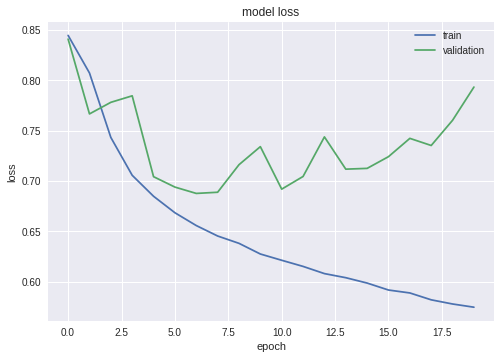

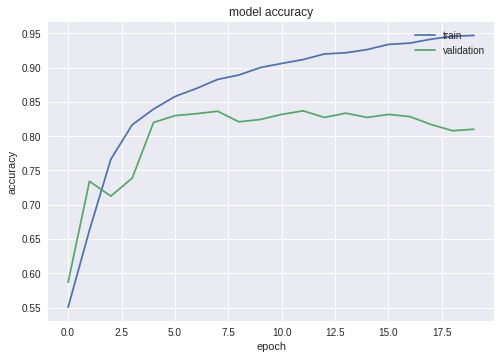

In [0]:
plotLosses(history1)
plotAcc(history1)

## Using IMDB weights for our financial dataset




In [0]:
import zipfile
zip_ref = zipfile.ZipFile("INFO7374_Assignment_3.zip", 'r')
zip_ref.extractall()
zip_ref.close()

In [0]:
import os
import json
import numpy as np
from random import randrange

def load_data(link):
  
  text = []
  sentiment = []

  for filename in os.listdir(link):
    if filename != '.ipynb_checkpoints':
      file_path = os.path.join(link, filename)
      with open(file_path, encoding = 'unicode_escape') as f:
        dic = json.load(f)

        for k, v in dic['text'].items():
          text.append(v)
        for k, v in dic['sentiment'].items():
          sentiment.append(v)
  return text, sentiment

def preprocess_data(text, sentiment):
  # 80-20 split
  combo = [list(i) for i in zip(text, sentiment)]
  
  combo_test = []

  test_size = int(len(combo)*0.2)
  while len(combo_test) < test_size:
    index = randrange(len(combo))
    combo_test.append(combo.pop(index))
  
  x_train = []
  y_train = []
  x_test = []
  y_test = []
  # x, y split
  for line in combo:
    x_train.append(line[0])
    if line[1] in ['Positive', 'positive', 'postive']:
      y_train.append(2)
    elif line[1] in ['Neutral', 'neutral', 'neutra', 'neutra;', 'Neural']:
      y_train.append(1)
    elif line[1] in ['Negative', 'negative', 'Negetive']:
      y_train.append(0)
    else:
      print('error in sentiment label {}'.format(line[1]))
  for line in combo_test:
    x_test.append(line[0])
    if line[1] in ['Positive', 'positive', 'postive']:
      y_test.append(2)
    elif line[1] in ['Neutral', 'neutral', 'neutra', 'neutra;', 'Neural']:
      y_test.append(1)
    elif line[1] in ['Negative', 'negative', 'Negetive']:
      y_test.append(0)
    else:
      print('error in sentiment label {}'.format(line[1]))
      
  return (x_train, y_train), (x_test, y_test)

In [0]:
link = "updated-json-files"
text, sentiment = load_data(link)
(x_train, y_train), (x_test, y_test) = preprocess_data(text, sentiment)



In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100  # We will cut reviews after 100 words
training_samples = len(x_train)  # We will be training on 200 samples
validation_samples = 10000  # We will be validating on 10000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(sentiment)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
#y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 6396 unique tokens.
Shape of data tensor: (1644, 100)
Shape of label tensor: (1644,)


In [0]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2019-03-18 20:22:24--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2019-03-18 20:22:24--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.46MB/s    in 3m 46s  

2019-03-18 20:26:10 (3.65 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [0]:
import zipfile
with zipfile.ZipFile("glove.6B.zip","r") as zip_ref:
    zip_ref.extractall()

In [0]:
embeddings_index = {}
f = open('glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [0]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [0]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adadelta',
              loss='poisson',
              metrics=['acc'])
model.load_weights('imdb_weights.h5',by_name=True)

model.summary()
history2 = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=128,
                    validation_data=(x_val,y_test))



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                17024     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 99        
Total params: 1,017,123
Trainable params: 1,017,123
Non-trainable params: 0
_________________________________________________________________
Train on 1316 samples, validate on 328 samples
Epoch 1/100
1316/1316 [==============================] - 3s 2ms/step - loss: 0.6940 - acc: 0.4605 - val_loss: 0.6859 - val_acc: 0.5061
Epoch 2/100
1316/1316 [==============================] - 1s 1ms/step - loss: 0.6791 - acc: 0.5068 - val_loss: 0.6682 - val_acc: 0.5061
Epoch 3/100
1316/1316 [==============================] - 2s 1ms/step - loss: 0.

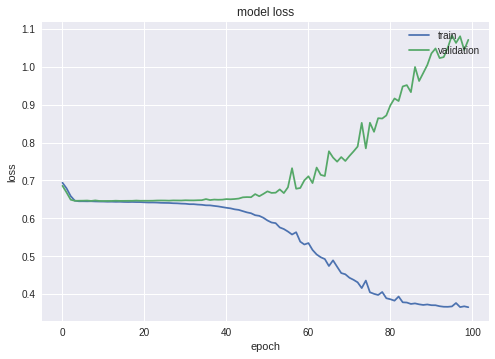

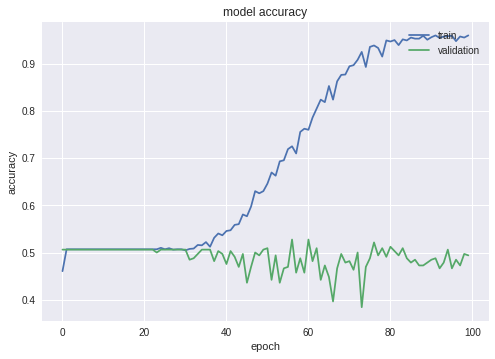

In [0]:
plotLosses(history2)
plotAcc(history2)

In [0]:
y_pred = model.predict_classes(x_val)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1),y_pred)
print("The accuracy score for this model is "+str(100*accuracy_score(y_test.argmax(axis=1),y_pred))+"% accurate.")

print_cm(cm,["positive","negative","neutral"])

The accuracy score for this model is 49.390243902439025% accurate.
       t/p   positive negative  neutral 
    positive      1.0     20.0     10.0 
    negative      4.0     97.0     65.0 
     neutral      8.0     59.0     64.0 


We notice that transfer learning accuracy is slightly higher than RNN accuracy from experiment 1.